In [15]:
def cost(prediction,label):
  s = len(label)
  return sum((prediction[i] - label[i]) ** 2 for i in range(s)) / (2 * s)

In [16]:
def gradient_descent(X, y, alpha=0.01, epochs=1000):
    m = len(X)
    n = len(X[0])

    weights = [0.0] * n
    bias = 0.0
    cost_history = []

    for epoch in range(epochs):
        
        yp = [
            sum(X[i][j] * weights[j] for j in range(n)) + bias
            for i in range(m)
        ]

        error = [yp[i] - y[i] for i in range(m)]

        dw = [
            sum(X[i][j] * error[i] for i in range(m)) / m
            for j in range(n)
        ]

        db = sum(error) / m

        # Update weights and bias
        for j in range(n):
            weights[j] -= alpha * dw[j]
        bias -= alpha * db

        # Mean Squared Error cost / 2
        cost = sum((yp[i] - y[i]) ** 2 for i in range(m)) / (2 * m)
        cost_history.append(cost)

        if epoch > 0 and abs(cost_history[-2] - cost_history[-1]) < 1e-6:
            break

    return weights, bias, cost_history

In [17]:
def standardize(X):
    m = len(X)
    n = len(X[0])

    means = [sum(X[i][j] for i in range(m)) / m for j in range(n)]

    stds = []
    for j in range(n):
        variance = sum((X[i][j] - means[j]) ** 2 for i in range(m)) / m
        std_dev = variance ** 0.5
        stds.append(std_dev if std_dev > 0 else 1.0)

    X_std = []
    for i in range(m):
        std_row = [(X[i][j] - means[j]) / stds[j] for j in range(n)]
        X_std.append(std_row)

    return X_std, means, stds

def standardize_y(y):
    mean = sum(y) / len(y)
    variance = sum((yi - mean) ** 2 for yi in y) / len(y)
    std_dev = variance ** 0.5 if variance > 0 else 1.0
    y_std = [(yi - mean) / std_dev for yi in y]
    return y_std, mean, std_dev

def predict(X, weights, bias, y_mean, y_std):
    y_std_pred = [
        sum(x[j] * weights[j] for j in range(len(weights))) + bias
        for x in X
    ]
    predictions = [yp * y_std + y_mean for yp in y_std_pred]
    return predictions


Observation: Standardisation is giving better scores than min-max scaling

In [18]:
import pandas as pd

def load_csv_data(filename):
    housing = pd.read_csv(filename)

    #shuffles the data randomly
    housing = housing.sample(frac=1, random_state=42).reset_index(drop=True)
    # Finding index of the target column
    target_col = 'median_house_value'

    # Convert boolean columns to numeric (0/1)
    housing = housing.replace({True: 1.0, False: 0.0})

    # Extract X and y, convert as normal arrays
    y = housing[target_col].astype(float).tolist()
    X = housing.drop(columns=[target_col]).astype(float).values.tolist()
    
    return X, y

Shuffled the data randomly, to prevent biasing

In [19]:
X, y = load_csv_data('california_prepared.csv')

C:\Users\LEGION\AppData\Local\Temp\ipykernel_27808\34526052.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housing = housing.replace({True: 1.0, False: 0.0})


In [20]:
def mae(y_pred, y_true):
    n = len(y_true)
    total_error = 0
    for i in range(n):
        total_error += abs(y_pred[i] - y_true[i])
    return total_error / n

def rmse(y_pred, y_true):
    n = len(y_true)
    total_squared_error = 0
    for i in range(n):
        total_squared_error += (y_pred[i] - y_true[i]) ** 2
    return (total_squared_error / n) ** 0.5

def r2_score(y_pred, y_true):
    n = len(y_true)
    mean_y = sum(y_true) / n
    ss_total = 0
    ss_residual = 0
    for i in range(n):
        ss_total += (y_true[i] - mean_y) ** 2
        ss_residual += (y_true[i] - y_pred[i]) ** 2
    return 1 - (ss_residual / ss_total)

In [21]:
import matplotlib.pyplot as plt

def plot_loss(cost_history):
    plt.plot(cost_history)
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.title("Training Loss Curve for pure Python Implementation")
    plt.grid(True)
    plt.show()

C:\Users\LEGION\AppData\Local\Temp\ipykernel_27808\34526052.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housing = housing.replace({True: 1.0, False: 0.0})


Training Time: 65.06941294670105
Final Cost: 0.18481894239169522
Final Weights: [0.0740564093411015, 0.16583208349663686, 0.6559929598619145, 0.06810660538666298, 0.025890887731657607, -0.10227861360022174, 0.06016691172901583, -0.011227643029366904, -0.04909633981466908, -0.008883321052026943, -0.008274518858872822, -0.07722548837925095, -0.06077040274414125, 0.04844451706970851, 0.04593442662019702, -0.17831781609442107, 0.023860747947999552, 0.06440066229048869, 0.11818585238904218, 0.026356747249831038, 0.026401740637320373, -0.040411797914670665]
Final Bias: 0.00044608361360409283
Training MAE: 51054.73723583868
Training RMSE: 70060.93665593947
Training R2 Score: 0.6303640545589422
Testing MAE: 51862.513956694245
Testing RMSE: 71510.44862593221
Testing R2 Score: 0.6200748659078814


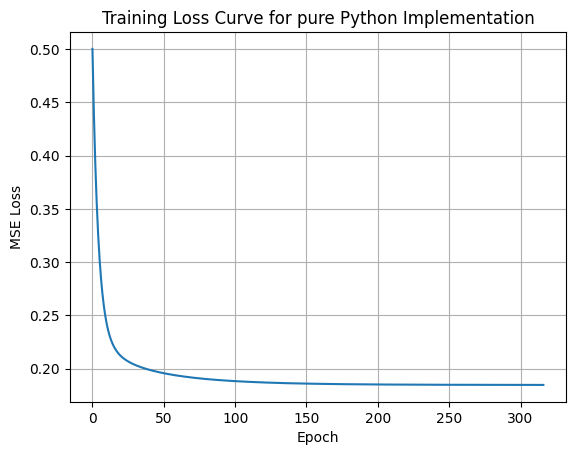

In [22]:
import time

def main():
    X, y = load_csv_data("california_prepared.csv")
    
    X_std, means, stds = standardize(X)
    
    train_size = int(0.8 * len(X))
    X_train = X_std[:train_size]
    X_test = X_std[train_size:]
    y_train_raw = y[:train_size]
    y_test = y[train_size:]
    
    y_train, y_mean, y_std_dev = standardize_y(y_train_raw)

    start_time = time.time()
    weights, bias, cost_history = gradient_descent(X_train, y_train, alpha=0.05, epochs=1000)
    end_time = time.time()
    
    print("Training Time:", end_time - start_time)
    print("Final Cost:", cost_history[-1])
    print("Final Weights:", weights)
    print("Final Bias:", bias)
    
    predictions_train = predict(X_train, weights, bias, y_mean, y_std_dev)
    predictions_test = predict(X_test, weights, bias, y_mean, y_std_dev)
    
    print("Training MAE:", mae(predictions_train, y_train_raw))
    print("Training RMSE:", rmse(predictions_train, y_train_raw))    
    print("Training R2 Score:", r2_score(predictions_train, y_train_raw))
    
    print("Testing MAE:", mae(predictions_test, y_test))
    print("Testing RMSE:", rmse(predictions_test, y_test))
    print("Testing R2 Score:", r2_score(predictions_test, y_test))
    
    plot_loss(cost_history)
    
if __name__ == "__main__":
    main()